# Data Exploration

In [1]:
import numpy as np
import scipy.ndimage as ndi
import imageio as imio
import matplotlib.pyplot as plt
import os
import seaborn as sns

# Load Data

In [2]:
RAW_IMAGES_PATH = '../../data/raw_data/plasmodium/'

In [3]:
train_images_paths = os.listdir(RAW_IMAGES_PATH)

In [4]:
train_images_paths

['20190401_145328.jpg',
 '20190319_153132.jpg',
 '20190320_124214.jpg',
 '20190401_153827.jpg',
 '20190320_102833.jpg',
 '20190411_130242.jpg',
 '20190409_122627(0).jpg',
 '20190411_130243.jpg',
 '20190320_131220.jpg',
 '20190320_102832.jpg',
 '20190401_153826.jpg',
 '20190411_130548(0).jpg',
 '20190322_122955.jpg',
 '20190411_125622(0).jpg',
 '20190411_151911.jpg',
 '20190405_143731.jpg',
 '20190319_153133.jpg',
 '20190401_145329.jpg',
 '20190320_105740.jpg',
 '20190319_153131.jpg',
 '20190319_152039.jpg',
 '20190410_112107.jpg',
 '20190405_115637(0).jpg',
 '20190320_102830.jpg',
 '20190319_152038.jpg',
 '20190410_103157.jpg',
 '20190411_132218(0).jpg',
 '20190411_151912.jpg',
 '20190405_143732.jpg',
 '20190405_143736.jpg',
 '20190410_103621.jpg',
 '20190411_123827.jpg',
 '20190410_103609.jpg',
 '20190401_123134.jpg',
 '20190320_102835.jpg',
 '20190401_123135.jpg',
 '20190320_124213.jpg',
 '20190410_103620.jpg',
 '20190411_123826.jpg',
 '20190409_130205.jpg',
 '20190409_130207.jpg',
 

In [5]:
train_images = []
train_images_gray_scale = []
train_images_shape = []

for i in train_images_paths:
    new_image = imio.imread(RAW_IMAGES_PATH+i)
    train_images.append(new_image)
    train_images_gray_scaleappend(new_image[:,:,0])
    train_images_shape.append(new_image.shape)
    

In [6]:
train_images_shape =  np.array(train_images_shape)

### Number of images in data set

In [7]:
len(train_images)

225

### Remove duplicated images

In [29]:
## TO DO:

### RENAME IMAGE FILES

In [31]:
## TO DO: We need to rename the image files, maybe some hash name?

#### Test random image

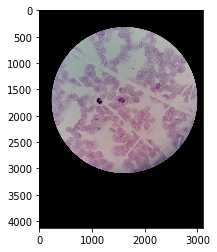

In [9]:
plt.imshow(train_images[5])

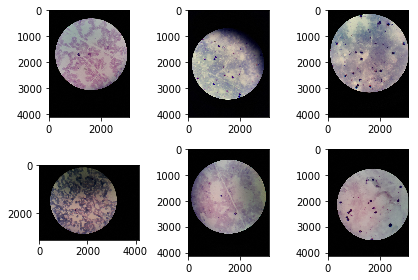

In [10]:
fig, axes = plt.subplots(2,3)
axes[0,0].imshow(train_images[5])
axes[1,0].imshow(train_images[2])

axes[0,1].imshow(train_images[10])
axes[1,1].imshow(train_images[4])

axes[0,2].imshow(train_images[15])
axes[1,2].imshow(train_images[6])


#fig = plt.gcf()
#for ax in fig.axes:
#    ax.axis('off')
plt.tight_layout()
plt.show()

## Images Shape

##### Get percentile, distribution of the height,weigth and area of images

In [11]:
train_images[5].shape

(4128, 3096, 3)

### Heights

In [12]:
heights = train_images_shape[:,0]

In [13]:
print('MEAN     : ' , np.mean(heights))
print('MAX VALUE: ' , np.amax(heights))
print('MIN VALUE: ' , np.amin(heights))
print('PCTL 25% : ' , np.percentile(heights, 25))
print('PCTL 50% : ' , np.percentile(heights, 50))
print('PCTL 75% : ' , np.percentile(heights, 75))

MEAN     :  3733.5466666666666
MAX VALUE:  4128
MIN VALUE:  3096
PCTL 25% :  3096.0
PCTL 50% :  4128.0
PCTL 75% :  4128.0


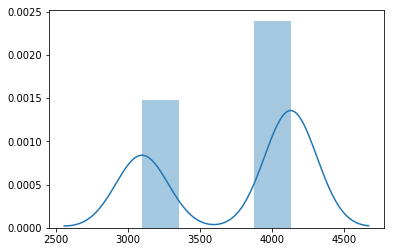

In [14]:
sns.distplot(heights)

### Widths

In [15]:
widths = train_images_shape[:,1]

In [16]:
print('MEAN     : ' , np.mean(widths))
print('MAX VALUE: ' , np.amax(widths))
print('MIN VALUE: ' , np.amin(widths))
print('PCTL 25% : ' , np.percentile(widths, 25))
print('PCTL 50% : ' , np.percentile(widths, 50))
print('PCTL 75% : ' , np.percentile(widths, 75))

MEAN     :  3490.4533333333334
MAX VALUE:  4128
MIN VALUE:  3096
PCTL 25% :  3096.0
PCTL 50% :  3096.0
PCTL 75% :  4128.0


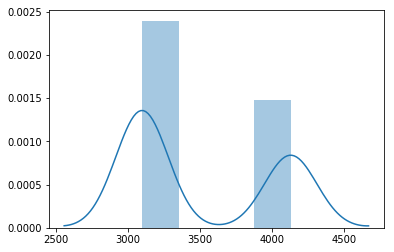

In [17]:
sns.distplot(widths)

## Find black area

Data type: uint8
Min. value: 0
Max value: 224


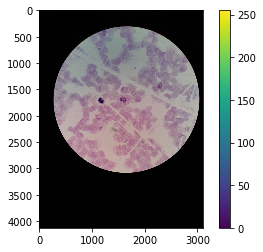

In [18]:
im = train_images[7]

print('Data type:', im.dtype)
print('Min. value:', im.min())
print('Max value:', im.max())


plt.imshow(im, vmin=0, vmax=255)
plt.colorbar()

### Creating an histogram
Lets display the distribution of values in an image

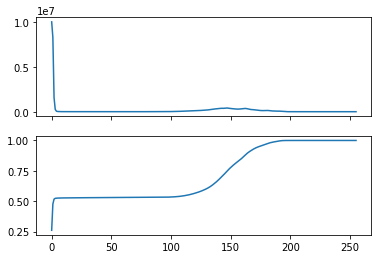

In [19]:
hist = ndi.histogram(im, min=0, max=255, bins=256)

# Create a cumulative distribution function
cdf = hist.cumsum() / hist.sum()

# Plot the histogram and CDF
fig, axes = plt.subplots(2, 1, sharex=True)
axes[0].plot(hist, label='Histogram')
axes[1].plot(cdf, label='CDF')

#### Image Segmentation

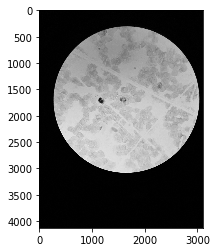

In [27]:
plt.imshow(im[:,:,0],cmap ='gray')

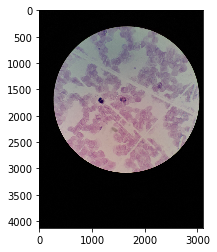

In [28]:
plt.imshow(im,cmap ='gray')

In [202]:
mask_blood = np.where(im >110, 1, 255)

In [203]:
mask_blood[1500,2500]

array([1, 1, 1])

array([1, 1, 1])

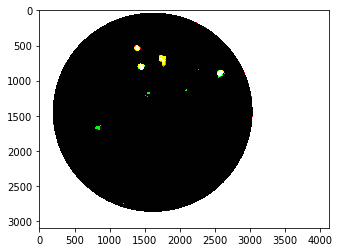

In [206]:
im = train_images[7]
mask_blood = np.where(im >110, 1, 255)
plt.imshow(mask_blood, cmap='gray')

In [146]:

#mask_blood = np.where(im <50, 1, 0)

mask_blood = np.where((im >50) & (im<200), 1, 0)

#fig, axes = plt.subplots(2, 1, sharex=True)
#axes[0].imshow(im)
#axes[1].imshow(im_blood)


In [147]:
labels, nlabels = ndi.label(mask_blood)
nlabels

13

In [167]:
labels[1].shape

(4128, 3)

In [150]:
overlay = np.where(labels>0, labels, np.nan)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


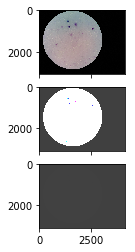

In [169]:
fig, axes = plt.subplots(3, 1, sharex=True)
axes[0].imshow(im)
axes[1].imshow(overlay, cmap='rainbow',alpha=0.75)
axes[2].imshow(labels, cmap='rainbow',alpha=0.75)
plt.show()

4485


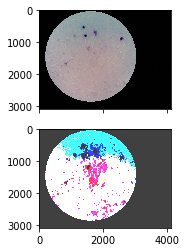

In [171]:
im = train_images[7]

mask_blood = np.where(im >150, 1, 0)

labels, nlabels = ndi.label(mask_blood)
print(nlabels)
overlay = np.where(labels> 0, 1, np.nan)

fig, axes = plt.subplots(2, 1, sharex=True)
axes[0].imshow(im)
axes[1].imshow(overlay, cmap='rainbow', alpha=0.75)
plt.show()

## Store data as numpy arrays

Save a binary file with the array represantation of images for the pre-procesing part

In [33]:
## TO DO: Save the images files with numpy

## Next Steps:
### Pre-Procesing
 * Define an unique size for images
     * Try to remove the black areas 
 * Center images
 
    